# Feature Exploration

Notebook to explore and catalog all features created so far in order to evaluate how to best use them

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import sys
sys.path.append('./../lib')
from parse_methods import parse_columns

In [15]:
listings_original = pd.read_csv('../Datasources/inside_airbnb/listings.csv')

In [16]:
listings = pd.read_csv('../Datasources/listings_augmented/listings_augmented_2018-05-31_V2.csv',low_memory=False)

IMPORTANT! Data Quality Issue - Row 4325 gets split into two when augmented dataframe is created in dataprep - it's ok to just drop the two rows

In [17]:
listings = listings.drop(listings.index[4323:4325])

In [18]:
listings.shape

(5751, 267)

# Nulls Analysis

In [19]:
null_cols_orig = listings_original.columns[listings_original.isnull().any()]
null_cols = listings.columns[listings.isnull().any()]

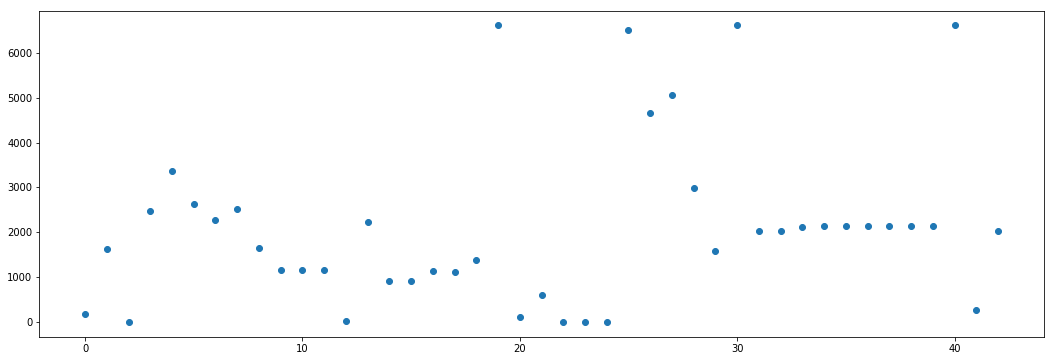

In [20]:
plt.figure(figsize=(18, 6))
plt.scatter(x=[i for i in range(len(null_cols_orig))],y=[listings_original[null_cols_orig].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

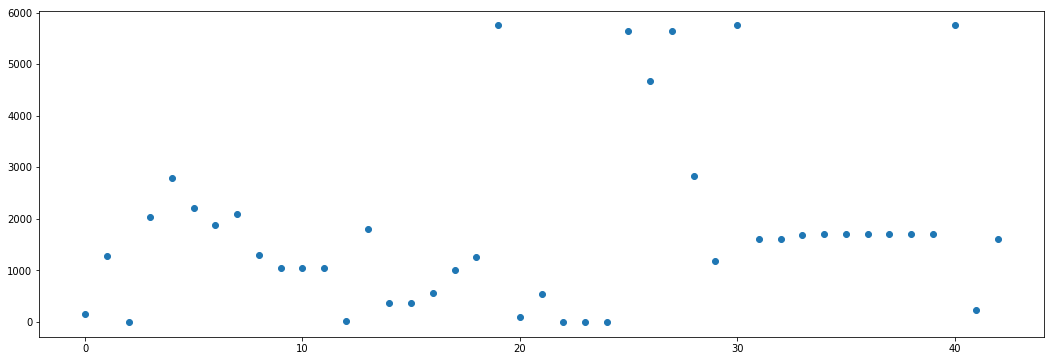

In [21]:
plt.figure(figsize=(18, 6))
plt.scatter(x=[i for i in range(len(null_cols))],y=[listings[null_cols].isnull().sum()])
#plt.xlabel([i for i in range(len(listings[listings.isnull().any(axis=1)].columns))])
plt.show()

In [22]:
listings[null_cols].isnull().sum()

summary                          157
space                           1275
description                        1
neighborhood_overview           2040
notes                           2799
transit                         2212
access                          1883
interaction                     2096
house_rules                     1292
thumbnail_url                   1057
medium_url                      1057
xl_picture_url                  1057
host_location                     18
host_about                      1804
host_response_time               377
host_response_rate               377
host_acceptance_rate             568
host_neighbourhood              1004
neighbourhood                   1267
neighbourhood_group_cleansed    5751
zipcode                           96
market                           548
bathrooms                         10
bedrooms                           3
beds                               4
square_feet                     5651
weekly_price                    4675
m

In [23]:
listings_original[null_cols_orig].isnull().sum()

summary                          173
space                           1635
description                        2
neighborhood_overview           2471
notes                           3375
transit                         2636
access                          2273
interaction                     2530
house_rules                     1642
thumbnail_url                   1166
medium_url                      1166
xl_picture_url                  1166
host_location                     24
host_about                      2228
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
neighbourhood_group_cleansed    6608
zipcode                          109
market                           605
bathrooms                         11
bedrooms                           3
beds                               4
square_feet                     6503
weekly_price                    4654
m

Nulls Analysis

Features that we will not use for modeling no matter what:
thumbnail_url, medium_url, xl_picture_url, 
first_review                    2018
last_review                     2024
jurisdiction_names               273
host_location (bad data)
market (bad data)



Features that have high number of nulls and will definitely be deleted:
    neighbourhood_group_cleansed, square_feet, weekly_price, monthly_price, security_deposit, has_availability, license

Features that have significant number of nulls and might potentially be deleted: 
    Text: space, neighborhood overview, notes, transit, access, interaction, house rules, host_about, 

Features that have many nulls and we may or may not be able to impute:
host_response_time               910
host_response_rate               910
host_acceptance_rate            1131
host_neighbourhood              1107
neighbourhood                   1387
cleaning_fee                    1584
review_scores_rating            2126
review_scores_accuracy          2142
review_scores_cleanliness       2141
review_scores_checkin           2143
review_scores_communication     2139
review_scores_location          2140
review_scores_value             2140

Features that have few nulls and can be imputed easily:
summary                          173
description                        2
zipcode                          109
bathrooms                         11
bedrooms                           3
beds                               4

# Exploring features that have no nulls

Features that will not be used for modeling:
'id',
'listing_url',
'scrape_id',
'last_scraped',
'picture_url',
'host_id',
'host_url',
'host_name',
'experiences_offered' (has all 'none'),
host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'street' (already have lat, long, and other geo features)
'state',
'smart_location' (using more exact geo data)
'country_code',
'country',
'is_location_exact',
'bed_type',
'extra_prople',
'maximum_nights',
'calendar_last_scraped',
'require_guest_profile_picture',
'require_guest_phone_verification'

Features that contain potentially useful info:
    name (contains listing headline) - a text column
    

Features we will use in transformed form:
    amenities, host_verifications,
    

Exploring the features Visually:

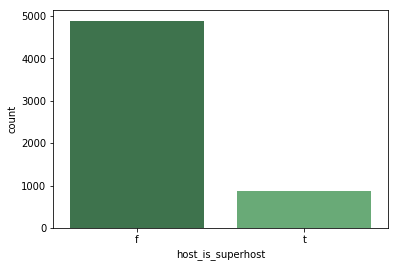

In [24]:
sb.countplot(x="host_is_superhost", data=listings, palette="Greens_d");

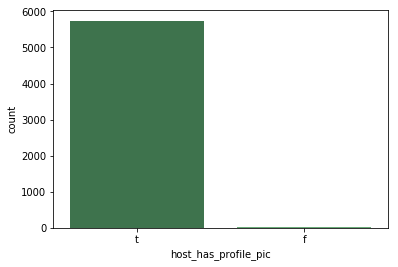

In [25]:
sb.countplot(x="host_has_profile_pic", data=listings, palette="Greens_d");

Insight: probably useless to use host_has_profile_pic

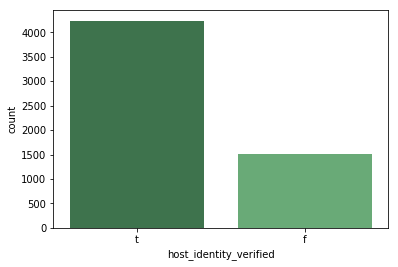

In [26]:
sb.countplot(x="host_identity_verified", data=listings, palette="Greens_d");

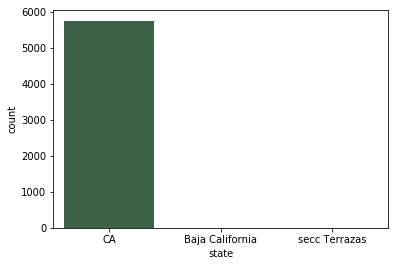

In [27]:
sb.countplot(x="state", data=listings, palette="Greens_d");

Insight: will not use state

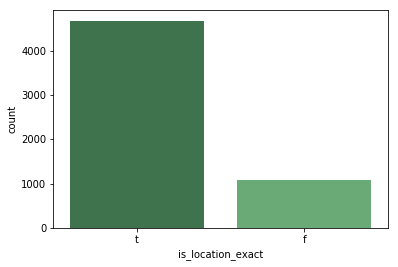

In [28]:
sb.countplot(x="is_location_exact", data=listings, palette="Greens_d");

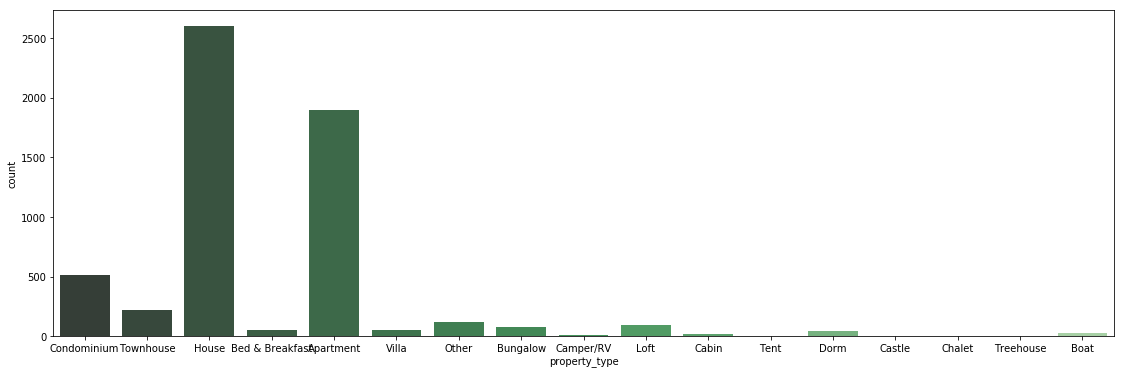

In [29]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings, palette="Greens_d");

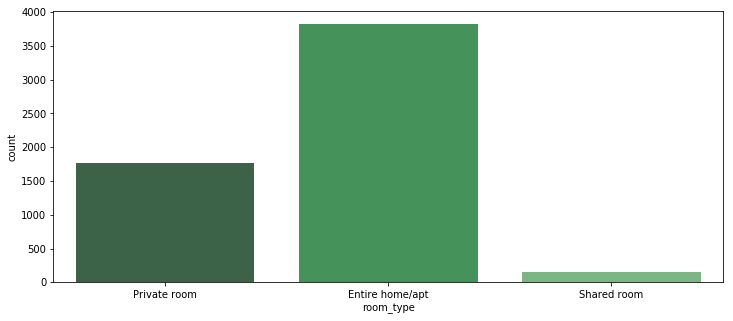

In [30]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="room_type", data=listings, palette="Greens_d");

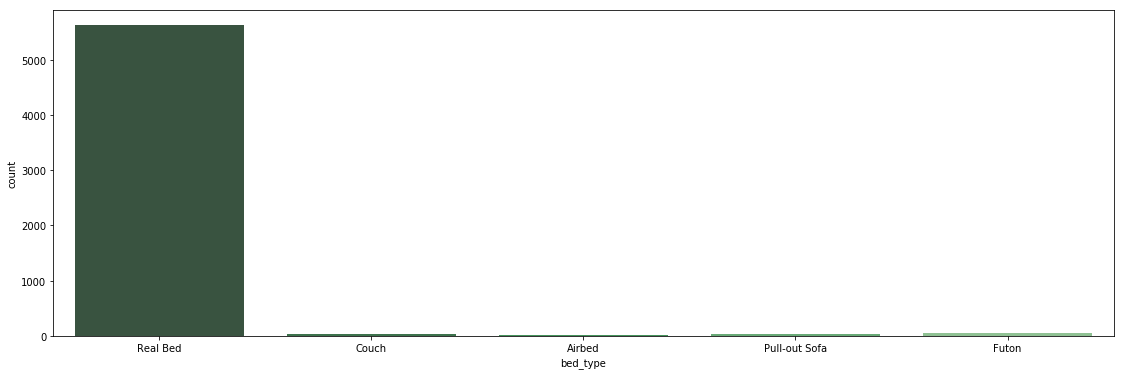

In [31]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="bed_type", data=listings, palette="Greens_d");

Insight: will not use bed type

Plotting Features Related to Listing Size

In [32]:
cols = ['accommodates','bathrooms', 'bedrooms', 'beds']

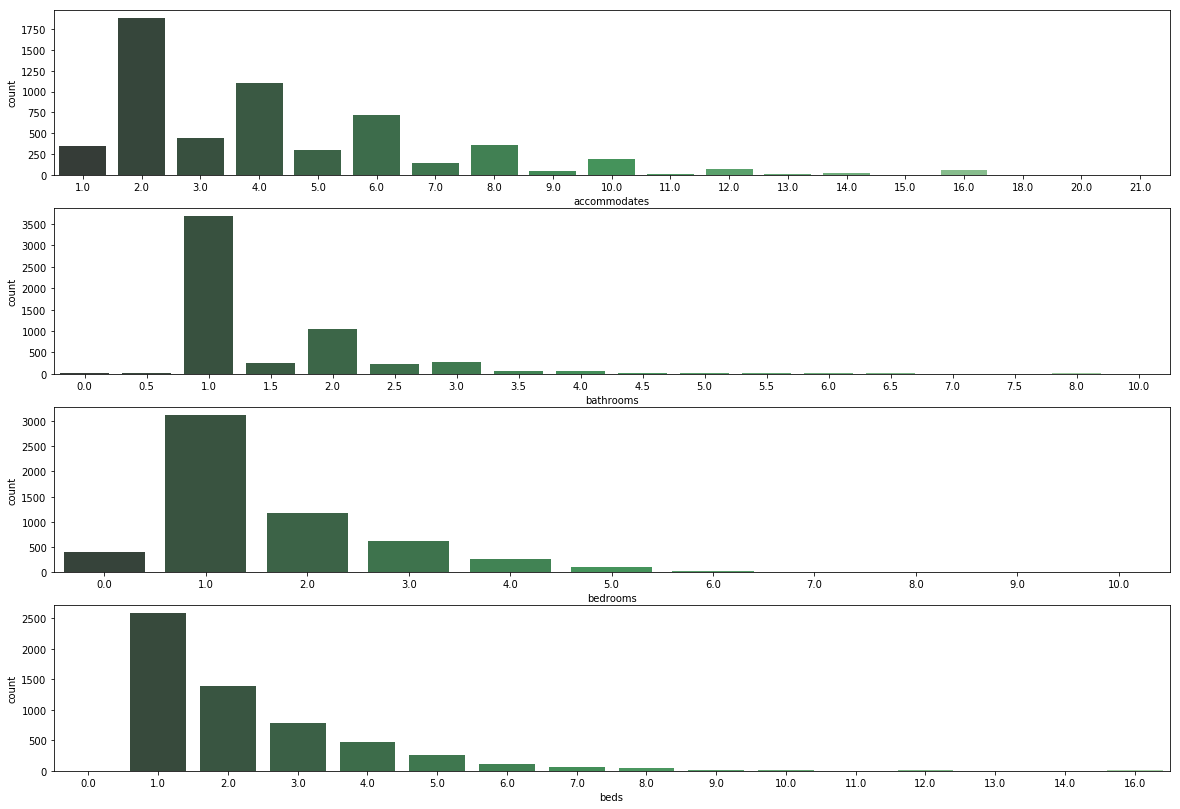

In [33]:
fig, axes = plt.subplots(nrows = len(cols), ncols = 1, sharex = False, sharey= False, figsize = (20,14))
for i,val in enumerate(cols):
    sb.countplot(ax=axes[i],x=val, data=listings, palette="Greens_d");

In [34]:
corrmx = listings.corr()

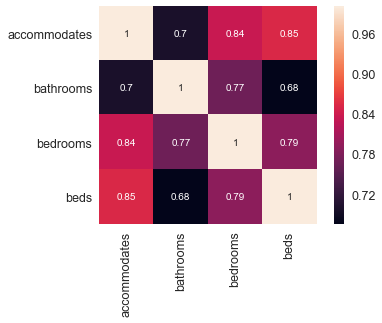

In [35]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)
plt.show()

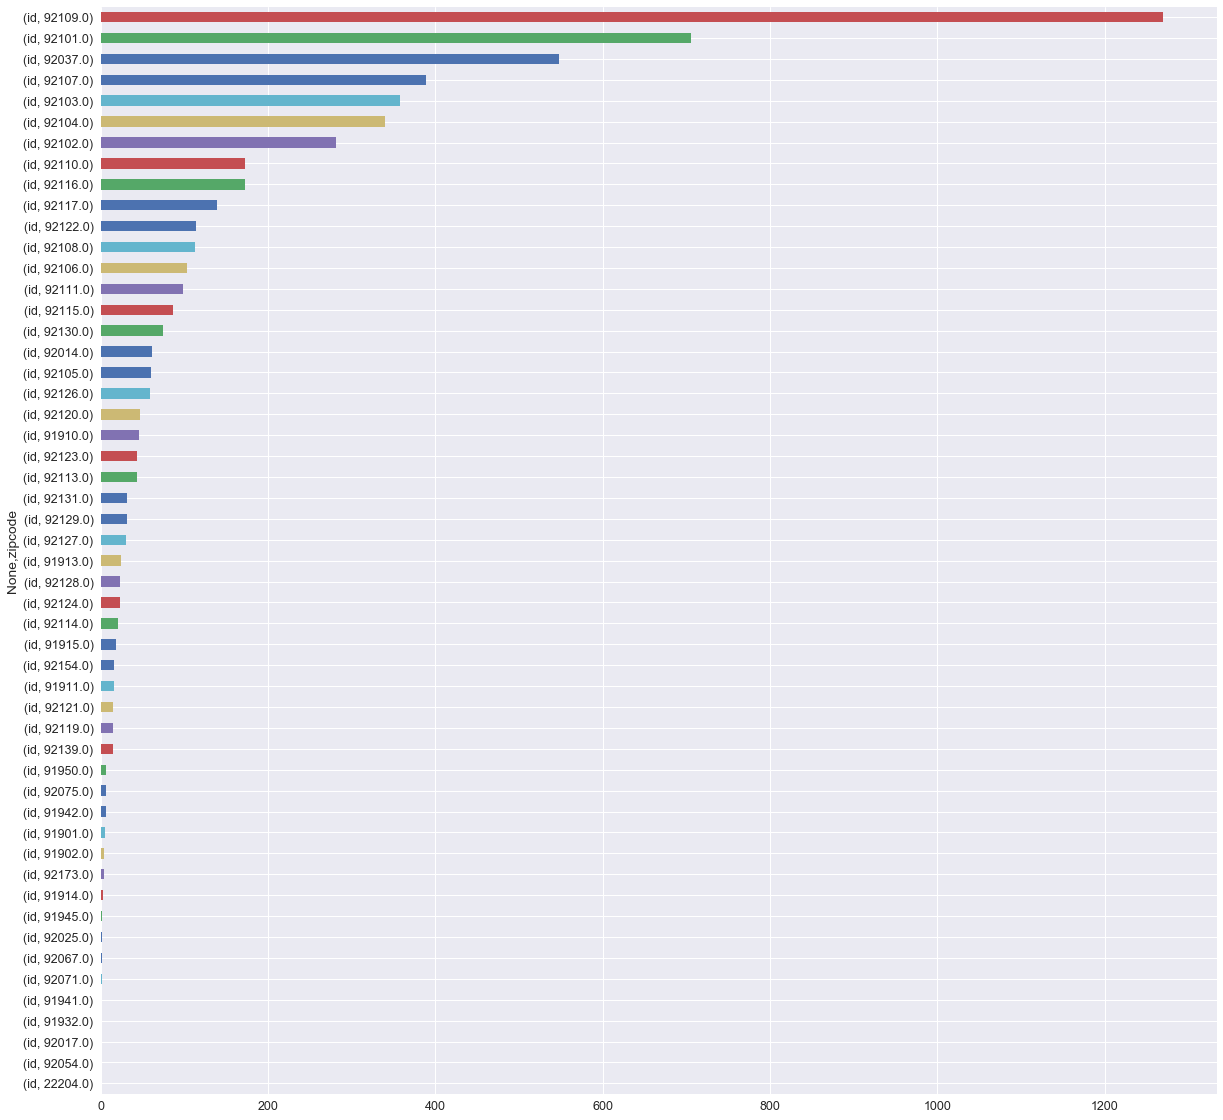

In [36]:
temp = listings.copy()
temp['zipcode'] = temp['zipcode'].astype(float)
nghbrd_list_count = temp[['zipcode','id']].groupby(['zipcode'])

plt.figure()
nghbrd_list_count.count().sort_values(by='id').unstack().plot(kind='barh', figsize=(20,20))
plt.show()

Amenities Visualization 

In [37]:
has = listings.filter(regex='has')
has = has.drop(columns=['host_has_profile_pic', 'has_availability', 'host_has_profile_pic_bin'])

In [38]:
has = parse_columns(has, ['has_Pets_Allowed','has_Wheelchair_Accessible','has_First_Aid_Kit', 
                          'has_Cat(s)','has_Pets_Allowed', 'has_24-Hour_Check-in']) 

In [39]:
#has_df = has_df.astype(float)
has_df = pd.DataFrame(has.sum(), columns=['Sum'])
has_df = has_df.sort_values(by='Sum')

In [40]:
has_df['Amenity'] = has_df.index

In [41]:
has_df['Amenity'] = has_df['Amenity'].astype(str)

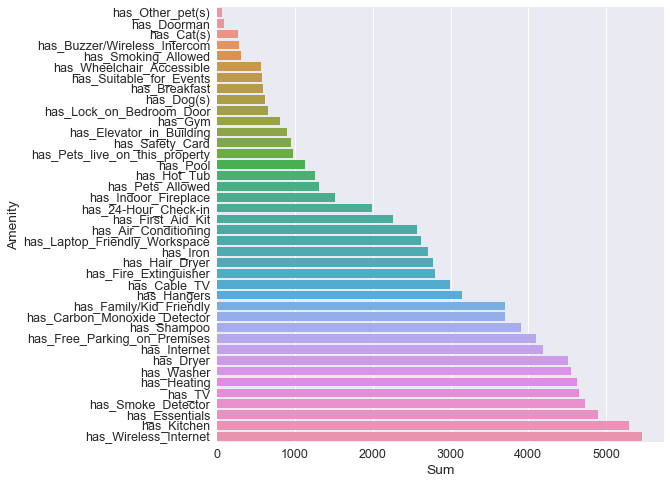

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
sb.barplot(ax = ax, y=has_df['Amenity'], x=has_df['Sum'], data=has_df);

Other Features

C:\Users\sanka\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


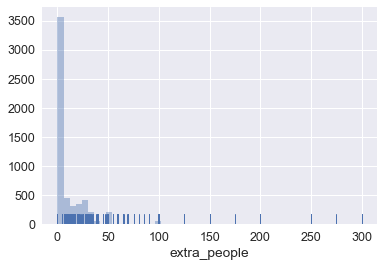

In [43]:
sb.distplot(listings['extra_people'], kde=False, rug=True)

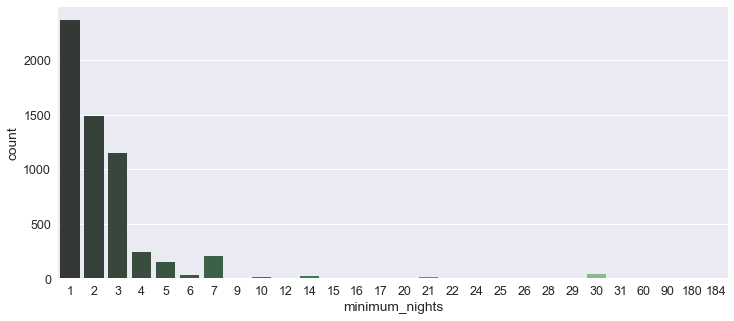

In [44]:
temp = pd.DataFrame(listings['minimum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="minimum_nights", data=temp, palette="Greens_d");

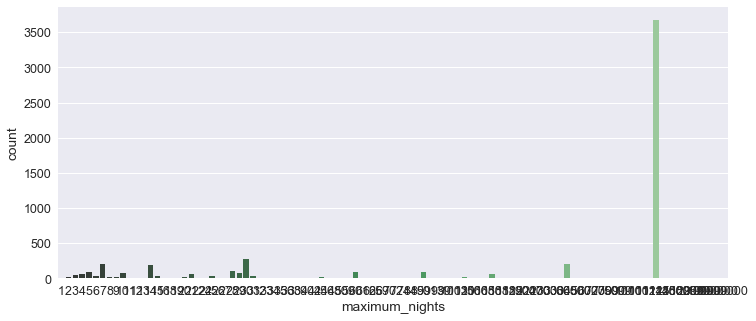

In [45]:
temp = pd.DataFrame(listings['maximum_nights'].astype(int))
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="maximum_nights", data=temp, palette="Greens_d");

Insight: min nights could be helpful, max nights no

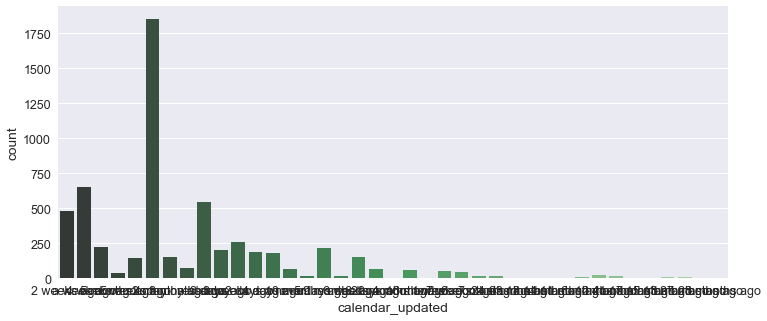

In [46]:
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="calendar_updated", data=listings, palette="Greens_d");

In [47]:
av_cols = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

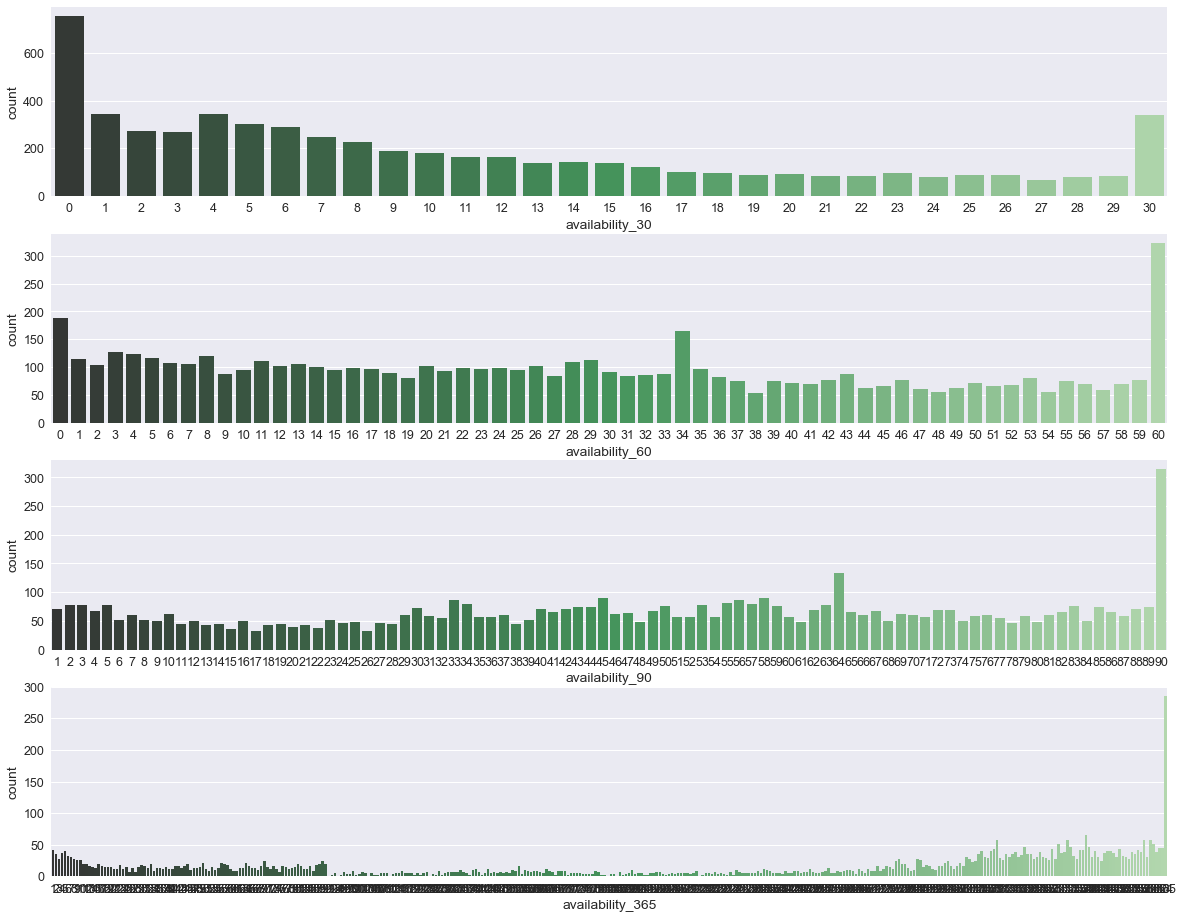

In [48]:
temp = listings[av_cols].astype(int)
fig, axes = plt.subplots(nrows = len(av_cols), ncols = 1, sharex = False, sharey= False, figsize = (20,16))
for i,val in enumerate(av_cols):
    sb.countplot(ax=axes[i],x=val, data=temp, palette="Greens_d");

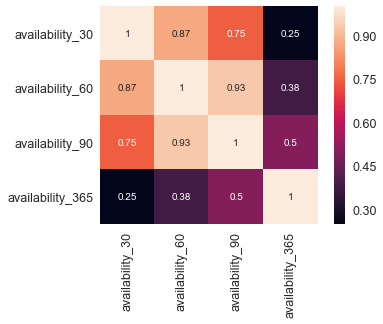

In [49]:
temp = listings.copy()
temp = temp.fillna(temp.mean())
cm = np.corrcoef(temp[av_cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size':10}, yticklabels=av_cols, xticklabels=av_cols)
plt.show()

Insight: will keep all 4 but will eventually end up using one of the 4 as they are highly correlated, probably availability_30

In [50]:
listings['number_of_reviews'].isnull().sum()

0

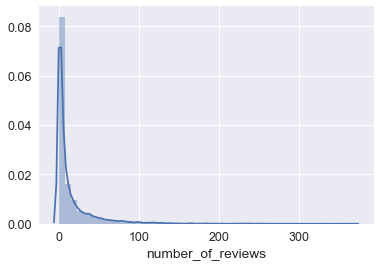

In [51]:
temp = pd.DataFrame(listings['number_of_reviews'].astype(float))
temp['number_of_reviews'] = temp['number_of_reviews'].replace([np.inf, -np.inf], np.nan)
sb.distplot(temp['number_of_reviews'].fillna(temp['number_of_reviews'].mean()))

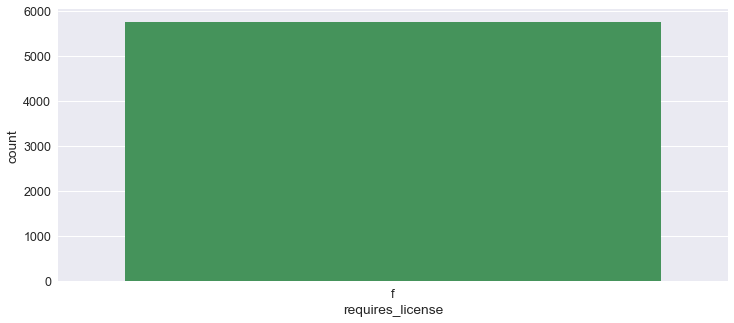

In [52]:
temp = pd.DataFrame(listings['requires_license'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="requires_license", data=temp, palette="Greens_d");

Insight: all false so will discard this variable

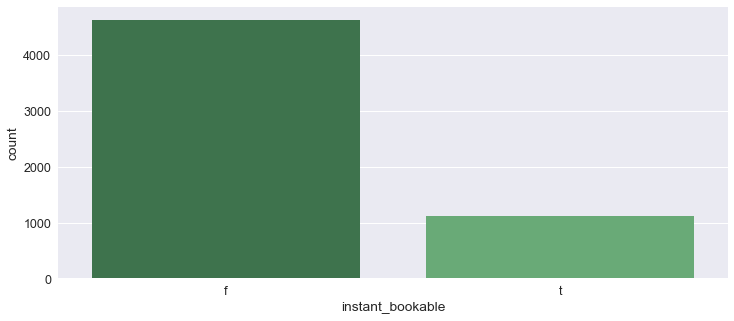

In [53]:
temp = pd.DataFrame(listings['instant_bookable'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="instant_bookable", data=temp, palette="Greens_d");

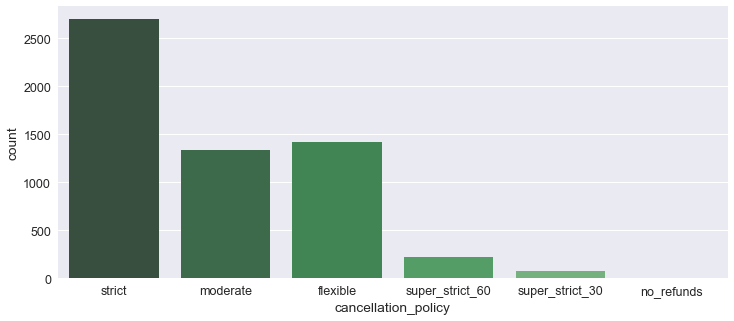

In [54]:
temp = pd.DataFrame(listings['cancellation_policy'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="cancellation_policy", data=temp, palette="Greens_d");

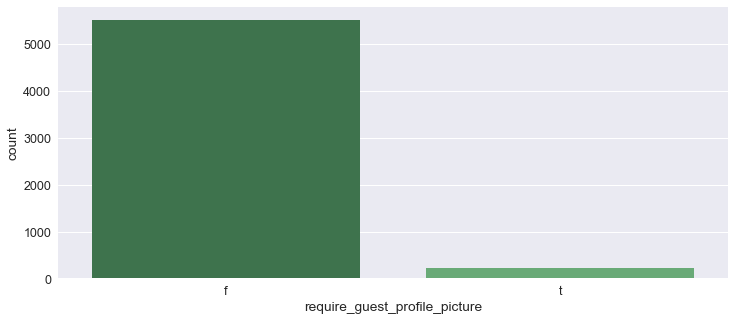

In [55]:
temp = pd.DataFrame(listings['require_guest_profile_picture'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="require_guest_profile_picture", data=temp, palette="Greens_d");

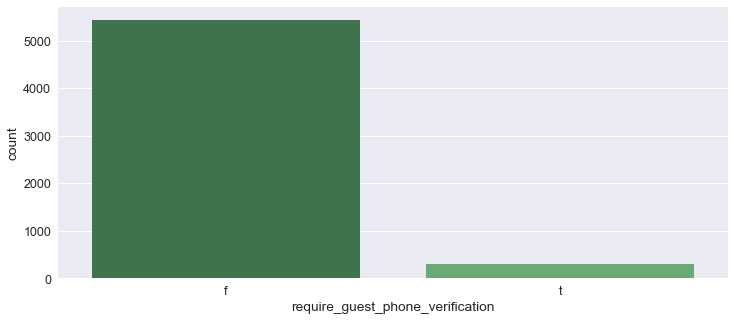

In [56]:
temp = pd.DataFrame(listings['require_guest_phone_verification'])
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="require_guest_phone_verification", data=temp, palette="Greens_d");

Insight: will discard the above two vars

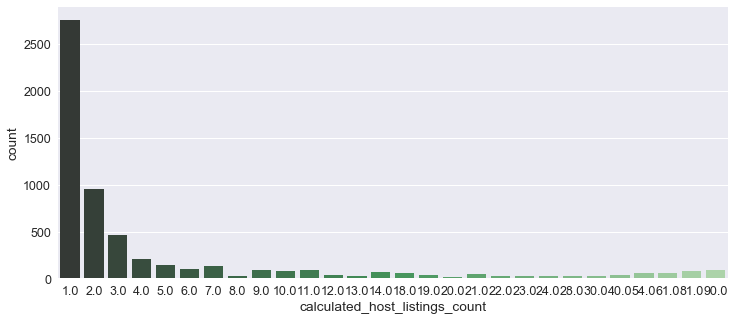

In [57]:
temp = pd.DataFrame(listings['calculated_host_listings_count'])
temp['calculated_host_listings_count'] = temp['calculated_host_listings_count'].replace([np.inf, -np.inf], np.nan)
fig, ax = plt.subplots(figsize=(12,5))
sb.countplot(ax=ax,x="calculated_host_listings_count", data=temp, palette="Greens_d");

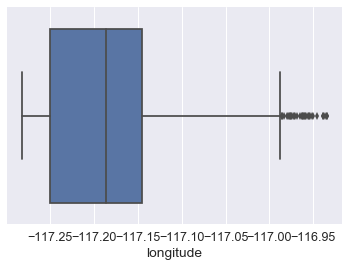

In [58]:
ax = sb.boxplot(x="longitude", data=listings_original)

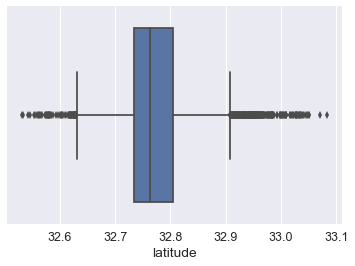

In [59]:
ax = sb.boxplot(x="latitude", data=listings_original)

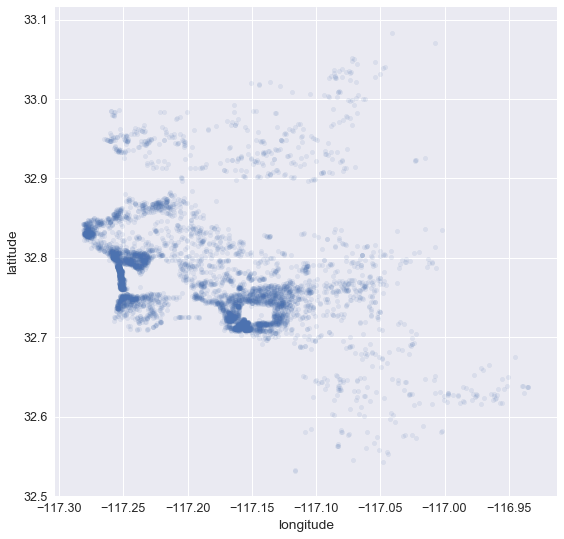

In [60]:
fig, ax = plt.subplots(figsize=(9,9))
listings_original.plot(ax=ax,kind='scatter',x='longitude',y='latitude', alpha=0.1)

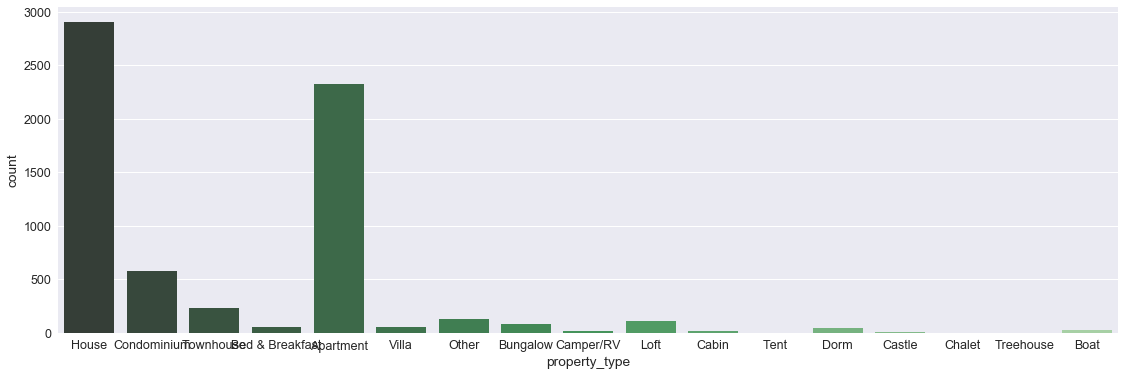

In [61]:
fig, ax = plt.subplots(figsize=(19,6))
sb.countplot(ax=ax,x="property_type", data=listings_original, palette="Greens_d");

In [62]:
#plot distance from ocean

Price Variable (Target Var)

In [63]:
y_scaled = preprocessing.scale(listings['price_y'])

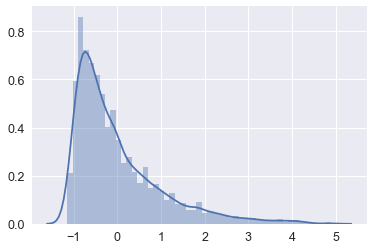

In [64]:
sb.distplot(y_scaled)

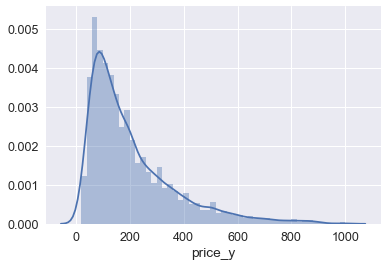

In [65]:
sb.distplot(listings['price_y'])

Now plotting transformations of price 

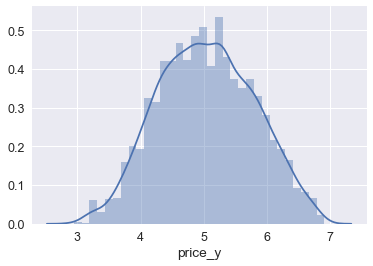

In [66]:
sb.distplot(np.log(listings['price_y']))

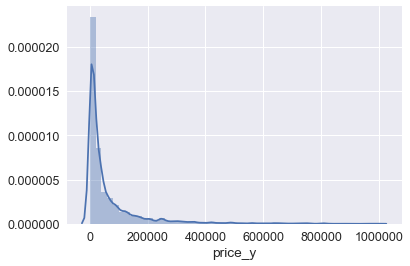

In [67]:
sb.distplot(listings['price_y']**2)

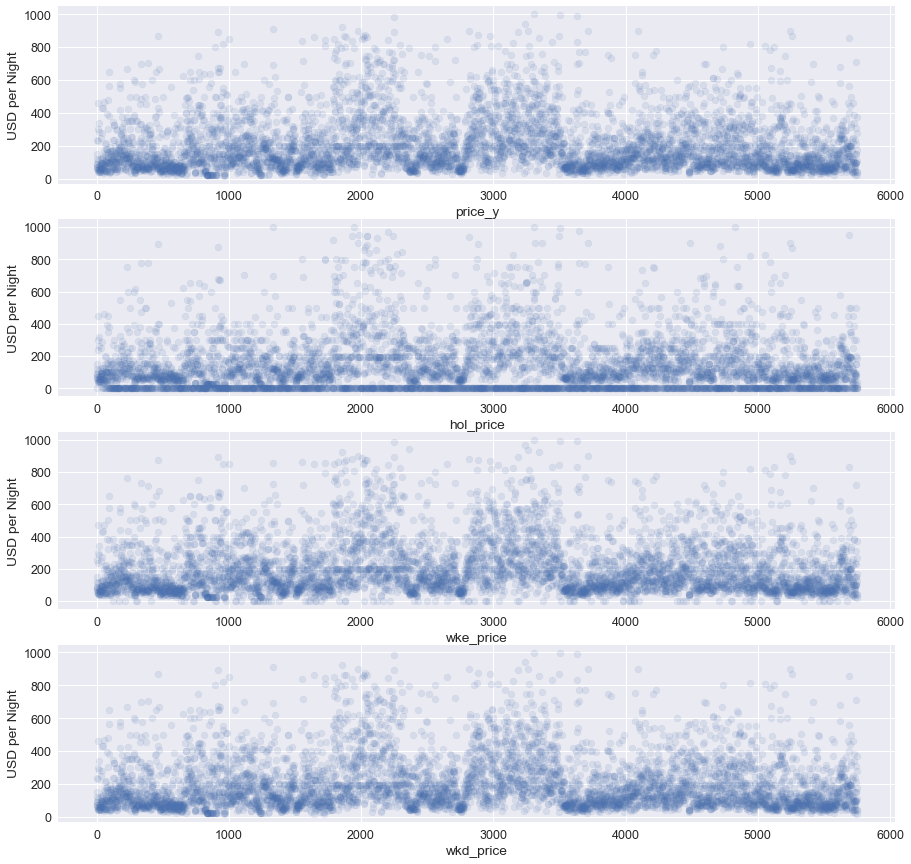

In [68]:
lst = ['price_y', 'hol_price', 'wke_price', 'wkd_price']

fig, axes = plt.subplots(nrows = len(lst), ncols = 1, sharex = False, sharey= False, figsize = (15,15))

for i,val in enumerate(lst):
    ax = axes[i]
    ax.set_ylabel('USD per Night')
    ax.legend(loc='upper left', framealpha=0.2, prop={'size':'small'})
    ax.set_xlabel(str(val))
    ax.scatter(listings.index, listings[val], label=str(val), alpha=0.12)

In [69]:
listings[['max_price',
 'median_price',
 'min_price',
 'price_y',
 'skew_of_price',
 'stdev_of_price']].head()

,max_price,median_price,min_price,price_y,skew_of_price,stdev_of_price
0,59.0,59.0,59.0,59.000000,1.930178,165.159132
1,120.0,120.0,120.0,120.000000,1.930178,165.159132
2,80.0,70.0,70.0,72.903226,1.930178,165.159132
3,80.0,70.0,70.0,72.641509,1.930178,165.159132
4,90.0,90.0,90.0,90.000000,1.930178,165.159132


In [70]:
listings[['hol_max_price',
'hol_median_price',
'hol_min_price',
'hol_price',
'hol_skew_of_price',
'hol_stdev_of_price']].head()

,hol_max_price,hol_median_price,hol_min_price,hol_price,hol_skew_of_price,hol_stdev_of_price
0,59.0,59.0,59.0,59.0,1.916101731955674,164.93312
1,120.0,120.0,120.0,120.0,1.916101731955674,164.93312
2,70.0,70.0,70.0,70.0,1.916101731955674,164.93312
3,70.0,70.0,70.0,70.0,1.916101731955674,164.93312
4,90.0,90.0,90.0,90.0,1.916101731955674,164.93312


In [71]:
listings[['wke_max_price',
'wke_median_price',
'wke_min_price',
'wke_price',
'wke_skew_of_price',
'wke_stdev_of_price',]].head()

,wke_max_price,wke_median_price,wke_min_price,wke_price,wke_skew_of_price,wke_stdev_of_price
0,59.0,59.0,59.0,59.000000,1.89154,167.591639
1,120.0,120.0,120.0,120.000000,1.89154,167.591639
2,80.0,75.0,70.0,75.000000,1.89154,167.591639
3,80.0,70.0,70.0,74.666667,1.89154,167.591639
4,90.0,90.0,90.0,90.000000,1.89154,167.591639


In [72]:
listings[[
'wkd_max_price',
'wkd_median_price',
'wkd_min_price',
'wkd_price',
'wkd_skew_of_price',
'wkd_stdev_of_price',]].head()

,wkd_max_price,wkd_median_price,wkd_min_price,wkd_price,wkd_skew_of_price,wkd_stdev_of_price
0,59.0,59.0,59.0,59.000000,1.930178,165.159132
1,120.0,120.0,120.0,120.000000,1.930178,165.159132
2,80.0,70.0,70.0,72.903226,1.930178,165.159132
3,80.0,70.0,70.0,72.641509,1.930178,165.159132
4,90.0,90.0,90.0,90.000000,1.930178,165.159132


Final List of Excluded Variables as of 5/31

In [73]:
excluded = ['id','reviews_per_month',
'listing_url',
'scrape_id',
'last_scraped',
'picture_url',
'host_id',
'host_url',
'host_name',
'host_about',
'experiences_offered',
'host_thumbnail_url',
'host_picture_url',
'host_has_profile_pic',
'street',
'city',
'state',
'smart_location',
'country_code',
'country',
'is_location_exact',
'bed_type',
'extra_prople',
'maximum_nights',
'calendar_last_scraped',
'require_guest_profile_picture',
'require_guest_phone_verification','thumbnail_url', 'medium_url', 'xl_picture_url', 'first_review',
'last_review','jurisdiction_names','host_location','market',
'host_response_time',               
'host_response_rate',           
'host_acceptance_rate',            
'host_neighbourhood',
'thumbnail_url',                   
'medium_url',                      
'xl_picture_url',           
'neighbourhood',
'cleaning_fee',                    
'review_scores_rating',            
'review_scores_accuracy',          
'review_scores_cleanliness',       
'review_scores_checkin',           
'review_scores_communication',     
'review_scores_location',          
'review_scores_value',
'amenities', #struct data type          
'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'has_availability',
'license',
'amenities_set', #strct datatype
'host_verifications',
            #text columns
'summary','name','description', 'host_since', 'transit', 'access', 'interaction', 'house_rules',
'notes','neighborhood_overview', 'host_about',
#other obj cols that should be dropped:
'neighbourhood_cleansed','city','property_type', 'room_type', 'price_x', 
'requires_license','closest_park', 'park_index',
'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude',
           'events_within_16_km','Unnamed: 0', 'zipcode_cleansed',
           'closest_park_full_name','closest_park_index','park_type']

In [74]:
encoded_bin = ['host_response_time','calendar_updated','bed_type',
               'jurisdiction_names', 'zipcode', 'cancellation_policy',
               'host_is_superhost', 'is_location_exact',
                'host_has_profile_pic', 'host_identity_verified',
                'instant_bookable', 'require_guest_profile_picture',
                'require_guest_phone_verification', 'closest_park_full_name',
               'all_events_within_1_km_at_min_distance','all_events_within_3_km_at_min_distance', 
               'all_events_within_5_km_at_min_distance']

In [75]:
excluded = excluded + encoded_bin

In [76]:
sankarshan_columns = ['listing_id_x', 'listing_id_y', 'id_1', 'id_2','distance_of_closest_park_y']
#, distance_of_closest_park_x

In [77]:
excluded = excluded + sankarshan_columns 

In [78]:
obj = [i for i in listings.select_dtypes(include=['object']).columns]

In [79]:
excluded = excluded + obj

In [80]:
encoded_notneeded = ['zipcode_enc']

In [81]:
excluded = excluded + encoded_notneeded

In [82]:
excluded = list(set(excluded))

In [83]:
included = ['has_Pets_Allowed',
 'has_Wheelchair_Accessible',
 'has_First_Aid_Kit',
 'has_Cat(s)',
 'has_24-Hour_Check-in',
 'uses_jumio',
'description-Topic0',
 'description-Topic1',
 'description-Topic4',
 'description-Topic5',
 'description-Topic6',
 'description-Topic10',
 'description-Topic11',
 'description-Topic12',
 'description-Topic13',
 'description-Topic15',
 'description-Topic17',
 'description-Topic18',
 'description-Dominant_Topic']

In [84]:
excluded = [i for i in excluded if i not in included]

In [85]:
%store excluded

Stored 'excluded' (list)


In [86]:
excluded

['reviews_per_month',
 'hol_skew_of_price',
 'zipcode',
 'medium_url',
 'host_neighbourhood',
 'require_guest_profile_picture',
 'host_acceptance_rate',
 'country_code',
 'review_scores_cleanliness',
 'property_type',
 'park_index',
 'Unnamed: 0',
 'closest_park_index',
 'host_since',
 'latitude',
 'closest_park_full_name',
 'security_deposit',
 'monthly_price',
 'all_events_within_5_km_at_min_distance',
 'weekly_price',
 'host_verifications',
 'review_scores_value',
 'host_id',
 'name',
 'notes',
 'calendar_updated',
 'summary',
 'thumbnail_url',
 'host_name',
 'host_has_profile_pic',
 'listing_url',
 'neighbourhood_cleansed',
 'street',
 'neighborhood_overview',
 'neighbourhood',
 'space',
 'price_x',
 'access',
 'state',
 'amenities_set',
 'square_feet',
 'all_events_within_1_km_at_min_distance',
 'host_url',
 'interaction',
 'license',
 'country',
 'requires_license',
 'host_is_superhost',
 'xl_picture_url',
 'scrape_id',
 'host_total_listings_count',
 'amenity_level',
 'review_sco